https://github.com/PsyTeachR/stat-models-v1/tree/master

In [4]:
source("_common.R")
suppressPackageStartupMessages({
    library("rio")
    library("car")
    library("lme4")
    library("knitr")
    library("markdown")
    library("lavaan")
    library("semPlot")
    library("repr")
    library("kableExtra")
})
set.seed(42)

In [7]:
data(sleepstudy)

just_308 <- sleepstudy %>%
    filter(Subject == "308")

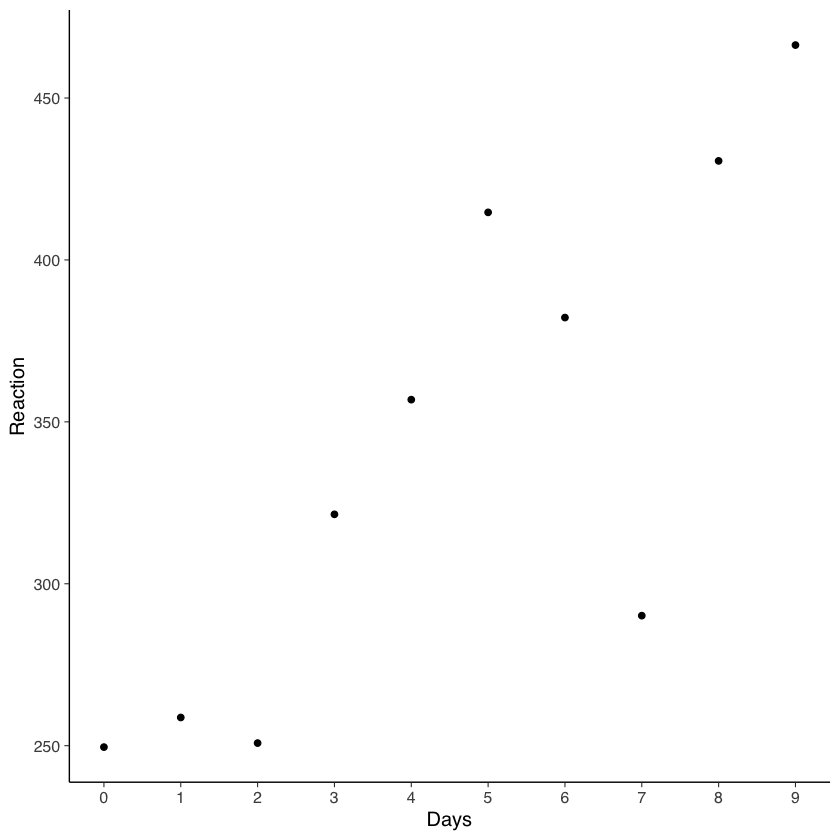

In [8]:
ggplot(just_308, aes(x = Days, y = Reaction)) +
    geom_point() +
    scale_x_continuous(breaks = 0:9)

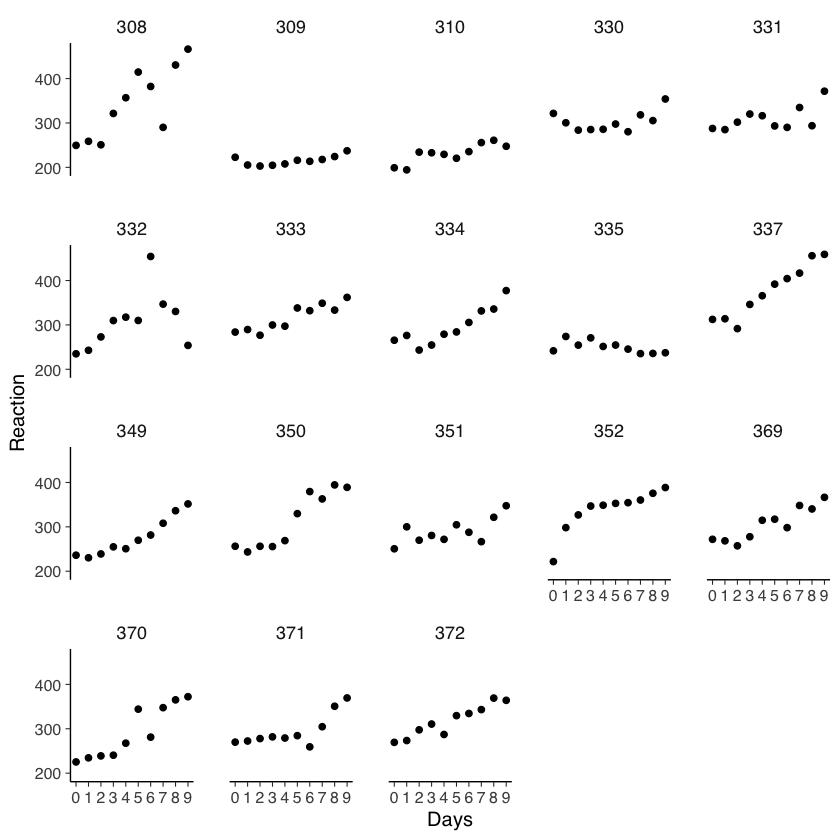

In [9]:
ggplot(sleepstudy, aes(x = Days, y = Reaction)) +
    geom_point() +
    scale_x_continuous(breaks = 0:9) +
    facet_wrap(~Subject)

In [10]:
sleep2 <- sleepstudy %>%
    filter(Days >= 2L) %>%
    mutate(days_deprived = Days - 2L)

In [11]:
sleep2 %>%
    count(days_deprived, Days)

days_deprived,Days,n
<dbl>,<dbl>,<int>
0,2,18
1,3,18
2,4,18
3,5,18
4,6,18
5,7,18
6,8,18
7,9,18


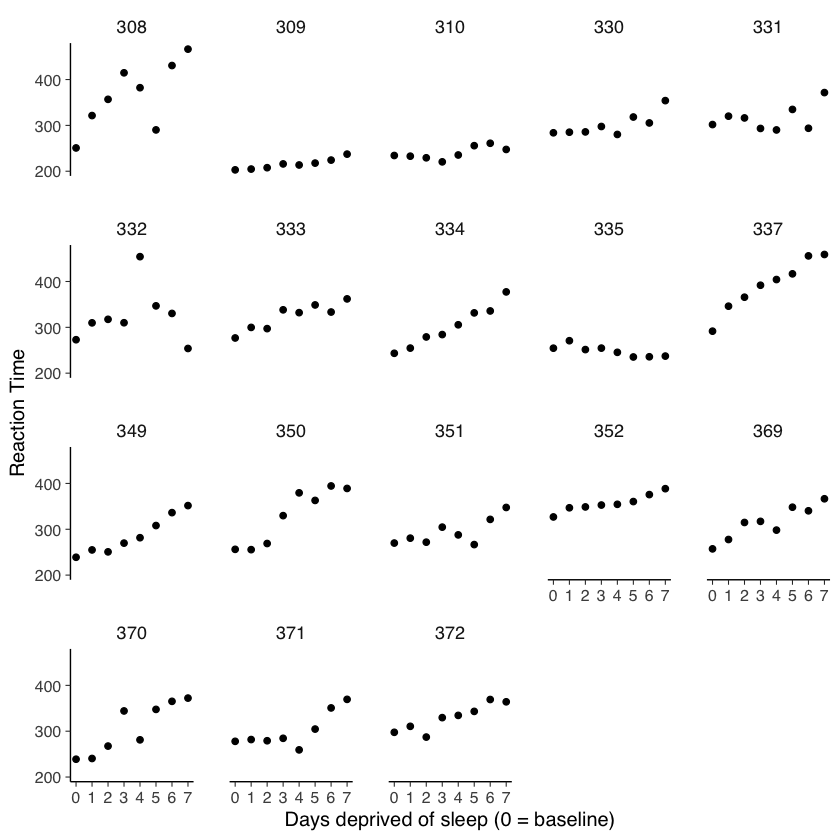

In [12]:
ggplot(sleep2, aes(x = days_deprived, y = Reaction)) +
    geom_point() +
    scale_x_continuous(breaks = 0:7) +
    facet_wrap(~Subject) +
    labs(y = "Reaction Time", x = "Days deprived of sleep (0 = baseline)")

In [13]:
cp_model <- lm(Reaction ~ days_deprived, sleep2)

summary(cp_model)


Call:
lm(formula = Reaction ~ days_deprived, data = sleep2)

Residuals:
     Min       1Q   Median       3Q      Max 
-112.284  -26.732    2.143   27.734  140.453 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    267.967      7.737  34.633  < 2e-16 ***
days_deprived   11.435      1.850   6.183 6.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.85 on 142 degrees of freedom
Multiple R-squared:  0.2121,	Adjusted R-squared:  0.2066 
F-statistic: 38.23 on 1 and 142 DF,  p-value: 6.316e-09


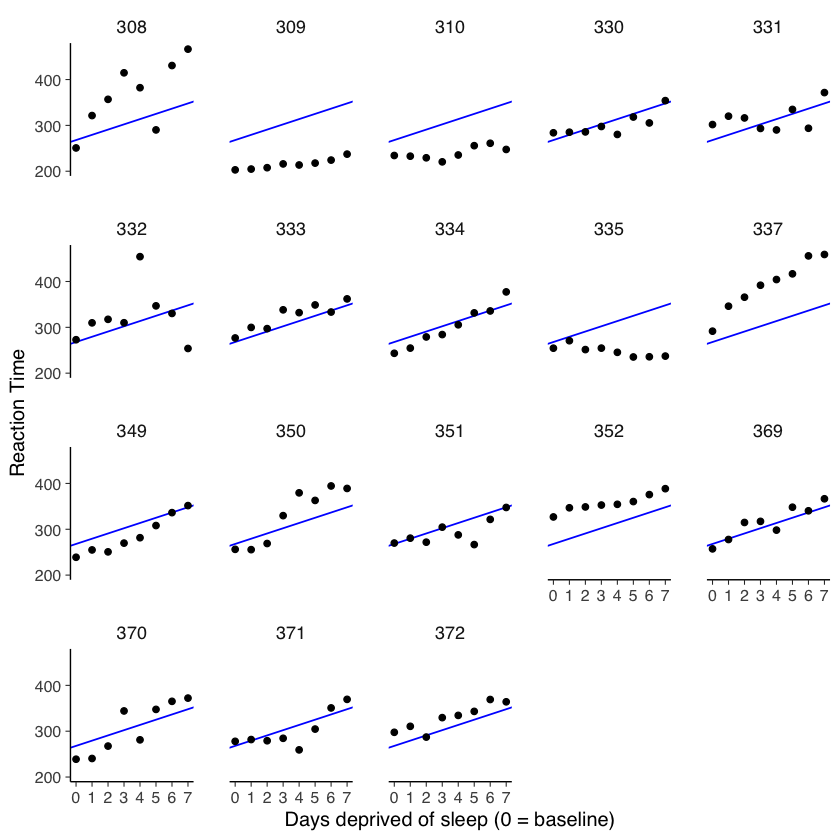

In [14]:
ggplot(sleep2, aes(x = days_deprived, y = Reaction)) +
    geom_abline(
        intercept = coef(cp_model)[1],
        slope = coef(cp_model)[2],
        color = "blue"
    ) +
    geom_point() +
    scale_x_continuous(breaks = 0:7) +
    facet_wrap(~Subject) +
    labs(y = "Reaction Time", x = "Days deprived of sleep (0 = baseline)")

In [15]:
sleep2 %>% summary()

    Reaction          Days         Subject   days_deprived 
 Min.   :203.0   Min.   :2.00   308    : 8   Min.   :0.00  
 1st Qu.:265.2   1st Qu.:3.75   309    : 8   1st Qu.:1.75  
 Median :303.2   Median :5.50   310    : 8   Median :3.50  
 Mean   :308.0   Mean   :5.50   330    : 8   Mean   :3.50  
 3rd Qu.:347.7   3rd Qu.:7.25   331    : 8   3rd Qu.:5.25  
 Max.   :466.4   Max.   :9.00   332    : 8   Max.   :7.00  
                                (Other):96                 

In [16]:
sleep2 %>%
    pull(Subject) %>%
    is.factor()

[1] TRUE

In [17]:
np_model <- lm(Reaction ~ days_deprived + Subject + days_deprived:Subject,
    data = sleep2
)

summary(np_model)


Call:
lm(formula = Reaction ~ days_deprived + Subject + days_deprived:Subject, 
    data = sleep2)

Residuals:
     Min       1Q   Median       3Q      Max 
-106.521   -8.541    1.143    8.889  128.545 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              288.2175    16.4772  17.492  < 2e-16 ***
days_deprived             21.6905     3.9388   5.507 2.49e-07 ***
Subject309               -87.9262    23.3023  -3.773 0.000264 ***
Subject310               -62.2856    23.3023  -2.673 0.008685 ** 
Subject330               -14.9533    23.3023  -0.642 0.522422    
Subject331                 9.9658    23.3023   0.428 0.669740    
Subject332                27.8157    23.3023   1.194 0.235215    
Subject333                -2.7581    23.3023  -0.118 0.906000    
Subject334               -50.2051    23.3023  -2.155 0.033422 *  
Subject335               -25.3429    23.3023  -1.088 0.279207    
Subject337                24.6143    23.3023   1.056 0.

In [18]:
all_intercepts <- c(
    coef(np_model)["(Intercept)"],
    coef(np_model)[3:19] + coef(np_model)["(Intercept)"]
)

all_slopes <- c(
    coef(np_model)["days_deprived"],
    coef(np_model)[20:36] + coef(np_model)["days_deprived"]
)

ids <- sleep2 %>%
    pull(Subject) %>%
    levels() %>%
    factor()

# make a tibble with the data extracted above
np_coef <- tibble(
    Subject = ids,
    intercept = all_intercepts,
    slope = all_slopes
)

np_coef

Subject,intercept,slope
<fct>,<dbl>,<dbl>
308,288.2175,21.690495
309,200.2913,4.357144
310,225.9318,3.898995
330,273.2642,8.005643
331,298.1833,4.867369
332,316.0332,2.395811
333,285.4593,10.875389
334,238.0123,18.115979
335,262.8746,-4.208992


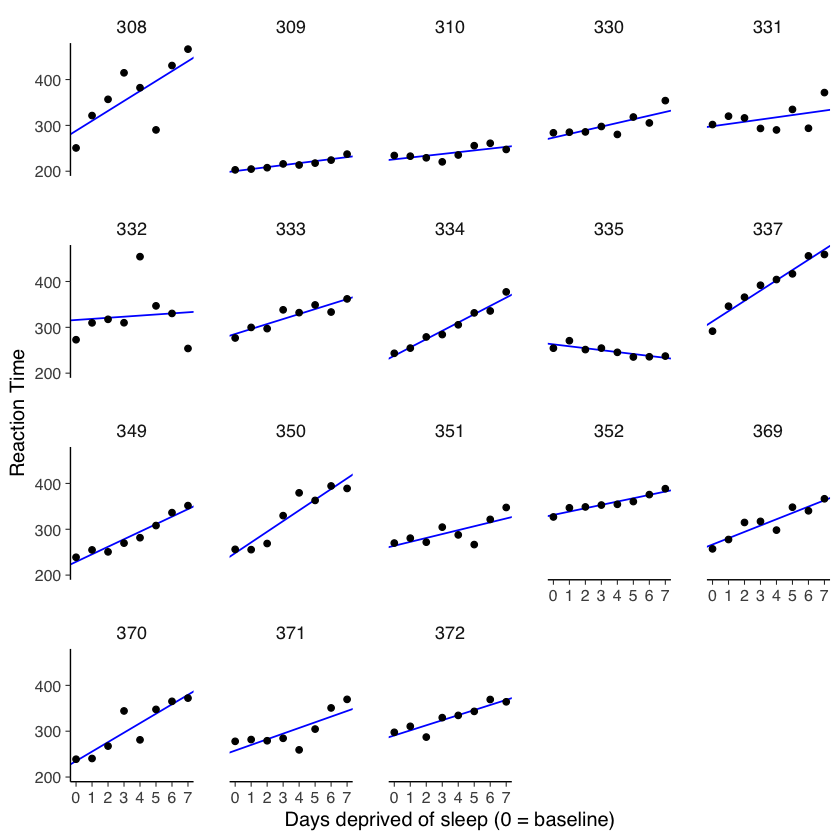

In [19]:
ggplot(sleep2, aes(x = days_deprived, y = Reaction)) +
    geom_abline(
        data = np_coef,
        mapping = aes(
            intercept = intercept,
            slope = slope
        ),
        color = "blue"
    ) +
    geom_point() +
    scale_x_continuous(breaks = 0:7) +
    facet_wrap(~Subject) +
    labs(y = "Reaction Time", x = "Days deprived of sleep (0 = baseline)")

In [20]:
np_coef %>%
    pull(slope) %>%
    t.test()


	One Sample t-test

data:  .
t = 6.1971, df = 17, p-value = 9.749e-06
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  7.542244 15.328613
sample estimates:
mean of x 
 11.43543 


*Level 1:*

\begin{equation}
Y_{sd} = \beta_{0s} + \beta_{1s} X_{sd} + e_{sd}
\end{equation}

*Level 2:*

\begin{equation}
\beta_{0s} = \gamma_{0} + S_{0s}
\end{equation}

\begin{equation}
\beta_{1s} = \gamma_{1} + S_{1s}
\end{equation}

*Variance Components:*

\begin{equation}
 \langle S_{0s}, S_{1s} \rangle \sim N\left(\langle 0, 0 \rangle, \mathbf{\Sigma}\right) 
\end{equation}

\begin{equation}
\mathbf{\Sigma} = \left(\begin{array}{cc}{\tau_{00}}^2 & \rho\tau_{00}\tau_{11} \\
         \rho\tau_{00}\tau_{11} & {\tau_{11}}^2 \\
         \end{array}\right) 
\end{equation}

\begin{equation}
e_{sd} \sim N\left(0, \sigma^2\right)
\end{equation}

In case you get lost, here's a table with an explanation for all of the variables in the set of equations above.

| Variable                 | Type      | Description                                                           |
|:-------------------------|:----------|:----------------------------------------------------------------------|
| $Y_{sd}$               | observed | Value of `Reaction` for subject $s$ on day $d$                    |
| $X_{sd}$               | observed | Value of `days_deprived` (0-7) for subject $s$ on day $d$                  |
| $\beta_{0s}$           | derived  | level 1 intercept parameter                                           |
| $\beta_{1s}$           | derived  | level 1 slope parameter                                               |
| $e_{sd}$               | derived  | Error for subject $s$, day $d$ |
| $\gamma_0$             | fixed    | Grand intercept ("gamma")                                             |
| $\gamma_1$             | fixed    | Grand slope ("gamma")                                                 |
| $S_{0s}$               | derived  | Random intercept (offset) for subject $s$                           |
| $S_{1s}$               | derived  | Random slope (offset) for subject $s$                               |
| $\mathbf{\Sigma}$      | random   | Variance-covariance matrix                                            |
| ${\tau_{00}}^2$        | random   | Variance of random intercepts                                         |
| $\rho$                 | random   | Random correlation between intercepts and slopes                      |
| ${\tau_{11}}^2$        | random   | Variance of random slopes                                             |
| $\sigma^2$             | random   | Error variance                                                        |

Note the "Status" column of the table contains values *fixed*, *random*, and *derived*. Although *fixed* and *random* are standard terms, *derived* is not; I have introduced it to help you think about what these different variables mean in the context of the model and to help you distinguish variables that are directly estimated from variables that are not.


In [21]:
newdata <- crossing(
    Subject = sleep2 %>% pull(Subject) %>% levels() %>% factor(),
    days_deprived = 0:7
)

head(newdata, 17)

Subject,days_deprived
<fct>,<int>
308,0
308,1
308,2
308,3
308,4
308,5
308,6
308,7
309,0


In [23]:
pp_mod <- lmer(Reaction ~ days_deprived + (days_deprived | Subject), sleep2)

summary(pp_mod)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ days_deprived + (days_deprived | Subject)
   Data: sleep2

REML criterion at convergence: 1404.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0157 -0.3541  0.0069  0.4681  5.0732 

Random effects:
 Groups   Name          Variance Std.Dev. Corr
 Subject  (Intercept)   958.35   30.957       
          days_deprived  45.78    6.766   0.18
 Residual               651.60   25.526       
Number of obs: 144, groups:  Subject, 18

Fixed effects:
              Estimate Std. Error t value
(Intercept)    267.967      8.266  32.418
days_deprived   11.435      1.845   6.197

Correlation of Fixed Effects:
            (Intr)
days_deprvd -0.062

In [25]:
newdata <- crossing(
    Subject = sleep2 %>% pull(Subject) %>% levels() %>% factor(),
    days_deprived = 0:7
)

head(newdata, 17)

Subject,days_deprived
<fct>,<int>
308,0
308,1
308,2
308,3
308,4
308,5
308,6
308,7
309,0


In [26]:
newdata2 <- newdata %>%
    mutate(Reaction = predict(pp_mod, newdata))

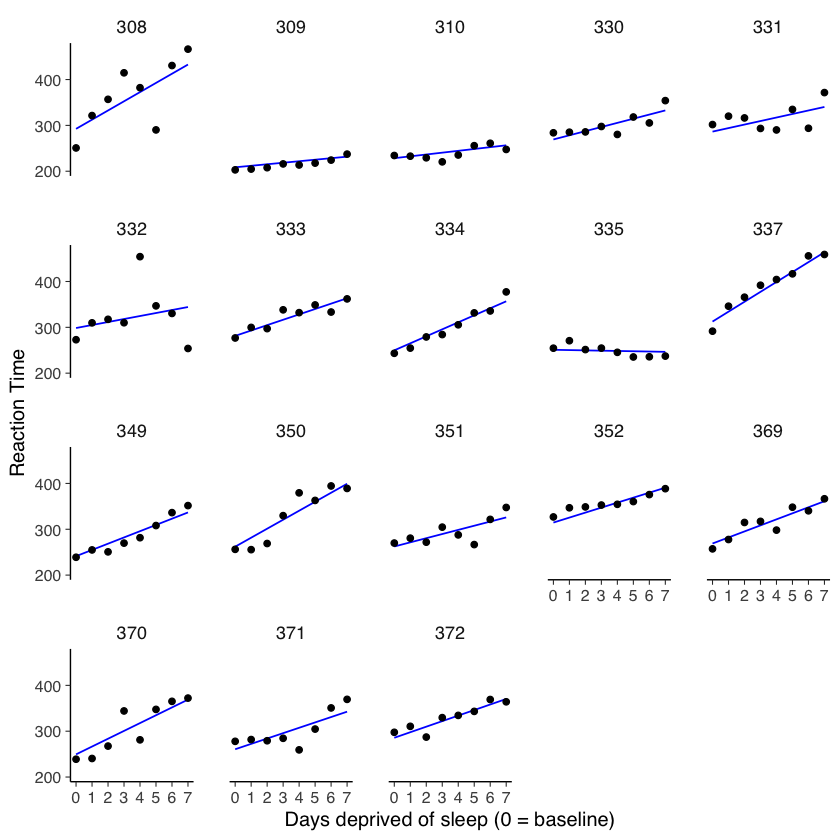

In [27]:
ggplot(sleep2, aes(x = days_deprived, y = Reaction)) +
    geom_line(
        data = newdata2,
        color = "blue"
    ) +
    geom_point() +
    scale_x_continuous(breaks = 0:7) +
    facet_wrap(~Subject) +
    labs(y = "Reaction Time", x = "Days deprived of sleep (0 = baseline)")